# WRF-HRRR GRIB2 Tutorial

### This tutorial includes a brief introduction to WRF-HRRR GRIB2 data, as well as how to download and extract the necessary information for a given geographical point in the continential United States from a GRIB2 file.
<div style="display:flex; justify-content:center;">
    <div style="flex:1; margin-right:50px; margin-left:200px">
        <img src="tut_figs/grib_cube.png" alt="Grib Cube Structure" style="width:80%">
    </div>
    <div style="flex:1; margin-left:50px; margin-right:100px">
        <img src="tut_figs/pic_grib.png" alt="Grib Parameter Structure" style="width:58%">
    </div>  
</div>


This tutorial includes:

 - [File Overview](#overview) 
 - [Downloading HRRR GRIB2](#download)
 - [Extracting data from GRIB2](#extraction)
 - [Additional Resources](#additional_resources)


### File Overview <a class="anchor" id="overview"></a>
---
The Weather Research and Forecasting (WRF) Model is a numerical weather prediction system developed by a collaboration of research organizations for simulating and forecasting weather conditions. It is an open-source model, allowing for users to modify the model to fit their applications. The High Resolution Rapid Refresh (HRRR) model is a derivative of the WRF model, providing a higher resolution of predictions generated every hour. The numerical weather observations of the HRRR model span across the entire continental United States, having the ability to not only forecast the weather, but also capturing rapidly evolving weather phenonma and severe weather predictions. 

The numerical weather measurements and predictions from the HRRR model are stored in GRIdded Binary version 2 (GRIB2) file format, a highly processed and compressed file format. The data in this file structure is often represented as a 3D cube, containing cartesian points on an XYZ coordinate plane. For each GRIB2 file, the file X and Y coordinates correspond to lattitudes and longitudes across the continential United States, while points in the Z plane represent the weather parameters that the HRRR model has measured. 

To handle these files, python was the language of choice. We have used a combination of the Herbie and Pygrib libraries to download and read the data for the respective counties. 



### Downloading HRRR GRIB2 <a class="anchor" id="download"></a>
---
NOTE: The command line examples apply to debian-based linux distributions. 
1. Prepare the system
    - Begin by installing the necessary packages into your environment
    
        ```
        sudo apt-get install pip;
        pip install ecmwflibs;
        pip install herbie-data
        conda install -c conda-forge pygrib
        ```
2. Download the files
    - First, import the necessary libraries 
    


In [19]:
from herbie import Herbie

- Set the desired date (yyyymmdd HH:MM) and directory to save

In [20]:
date = "20210101 11:00"
save_dir = "/path/to/save/files/"

- Set the desired number of hours to predict in the future (0 for real-time)
- NOTE: precipitation and all other accumulation metric values are 0 for real-time. 

In [21]:
pred_hours = 0
precip_pred_hours = 1

- Load the values into Herbie objects

In [22]:
herb_obj = Herbie(date, model="hrrr",
                  product="sfc", save_dir=save_dir,
                  verbose=True, fxx=pred_hours,
                  priority= ['pando', 'pando2', 'aws', 'nomads',
                                           'google', 'azure'],# ['pando', 'pando2', 'aws', 'nomads'],
                  overwrite=True)

precip_herb_obj = Herbie(date, model="hrrr",
                  product="sfc", save_dir=save_dir,
                  verbose=True, fxx=precip_pred_hours,
                  priority= ['pando', 'pando2', 'aws', 'nomads',
                                           'google', 'azure'],# ['pando', 'pando2', 'aws', 'nomads'],
                  overwrite=True)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jan-01 11:00 UTC F00 ┊ GRIB2 @ pando ┊ IDX @ pando
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Jan-01 11:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


- Now the objects can be segmented into parameters of choice using regex strings of the shortnames for the parameters and their levels. A list of GRIB2 shortnames can be found [here](https://codes.ecmwf.int/grib/param-db/?filter=grib2) and an interactive tutorial of how do use regex strings can be found [here](https://regexone.com/)
    - When segmenting the files into parameters of choice, one can either keep the data in memory or download the file. The entire file will all parameters can be downloaded with the command:

In [23]:
herb_obj.download()
precip_herb_obj.download()

👨🏻‍🏭 Created directory: [/media/kaleb/extraSpace/hrrr/20210101]


PosixPath('/media/kaleb/extraSpace/hrrr/20210101/hrrr.t11z.wrfsfcf01.grib2')


### Extracting From GRIB2 <a class="anchor" id="extraction"></a>
---

There are two python libraries used for downloading and extracting data from GRIB2 files. They are Pygrib and Herbie. Herbie is used for download and extracting, while Pygrib is used for extracting. If wishing to keep the process in memory, Herbie is best to use. If wishing to extract from files download onto hard drive memory, Pygrib is best to use. Both methods are shown in this tutorial.. 

It should be noted that the regex strings can be used for both downloading and loading the data into an array, however for the purposes of this tutorial, the data will be loaded into an array. 

The 6 HRRR parameters used in this dataset are 2 meter temperature, 2 meter relative humidity, u component of wind (level 1000kPa), v component of wind (level 1000kPa), wind gust, and downward shortwave radiation flux. The steps to extracting the data for these parameters are as follows: 

#### Using Herbie

If not wanting to download the files, one can load a GRIB2 file into an Herbie object and index the needed parameters at their specific geographical locations. The steps for doing this are as follows: 

- Use the above code to load a file into an Herbie object. Skip the step to download. The files will still be downloaded, however they will be automatically deleted after using. 

- Declare the geographic coordinates of interest with a longitude, latitude tuple, with longitude in the (-180, 180) range. 

In [24]:
lsu = (-91.1783, 30.414)
ull = (-92.014, 30.213)
coordinates = [lsu, ull]
coord_names = ["lsu", "ull"]

- Use regex strings to load the herbie object into a segmented xarray

In [25]:
t2m_rh = herb_obj.xarray(":(?:TMP|RH):2 m")
u_v = herb_obj.xarray(":(U|V)GRD:1000 mb:")
dswrf = herb_obj.xarray(":DSWRF:surface:anl")
gust = herb_obj.xarray(":GUST:")
precip = precip_herb_obj.xarray(":APCP:surface:")

/home/kaleb/miniconda3/envs/postproc/lib/python3.9/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


- Note: the arguments for the "xarray" command are the short names of the parameters. A complete list of the shortnames available in GRIB2 files can be found [here](https://codes.ecmwf.int/grib/param-db/?filter=grib2).  

- Each of these parameters can be plotted with the plot() command

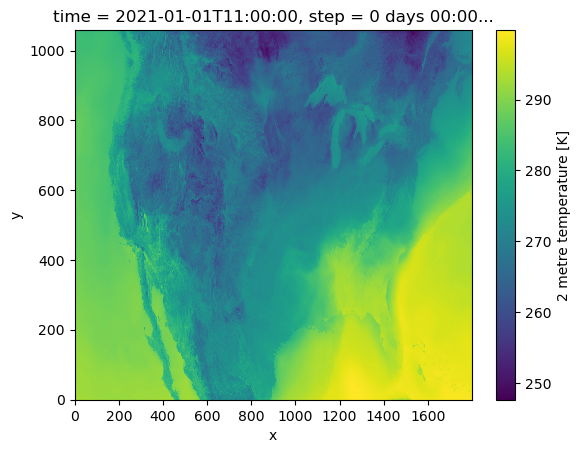

In [26]:
t2m_rh.t2m.plot()

- For a more detailed map, EasyMap can be used

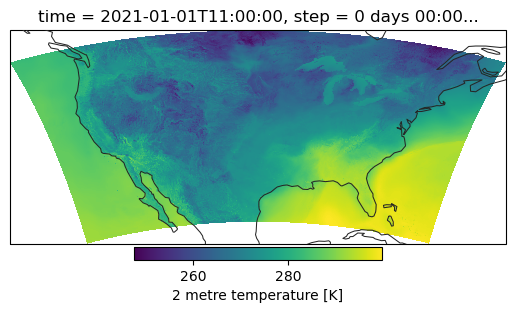

In [27]:
from toolbox import EasyMap, pc, ccrs

ax = EasyMap().ax
t2m_rh.t2m.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)

- Use the xarrays and coordinates to generate an array of the geographical points which contain the closest values

In [28]:
t2m_rh_arr = t2m_rh.herbie.nearest_points(points=coordinates, names=coord_names)
u_v_arr = u_v.herbie.nearest_points(points=coordinates, names=coord_names)
dswrf_arr = dswrf.herbie.nearest_points(points=coordinates, names=coord_names)
gust_arr = gust.herbie.nearest_points(points=coordinates, names=coord_names)
precip_arr = precip.herbie.nearest_points(points=coordinates, names=coord_names)

/home/kaleb/miniconda3/envs/postproc/lib/python3.9/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/kaleb/miniconda3/envs/postproc/lib/python3.9/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/kaleb/miniconda3/envs/postproc/lib/python3.9/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "r2".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/kaleb/miniconda3/envs/postproc/lib/python3.9/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/home/kaleb/miniconda3/envs/postp

- Index the parameters from these arrays in order to get them into a usable format

In [29]:
t2m_values = t2m_rh_arr.t2m.values
rh_values = t2m_rh_arr.r2.values
u_values = u_v_arr.u.values
v_values = u_v_arr.v.values
dswrf_values = dswrf_arr.dswrf.values
gust_values = gust_arr.gust.values
precip_values = precip_arr.tp.values

print("Extracted Values for points: (-91.1783, 30.414) and (-92.014, 30.213)")
print("-----------------------------------------------------------------------")
print("2 Meter Temperature[K]: ", t2m_values, "\n2 Meter Relative Humidity[%]: ", rh_values,\
      "\nU Component of Wind[m s**-1]: ", u_values, "\nV Component of Wind[m s**-1]: ", v_values,\
      "\nDownward Short Wave Radiation Flux[W m**-2]: ", dswrf_values, "\nWind Gust[m s**-1]: ", gust_values,\
      "\nPrecipitation [kg m**-2]: ", precip_values)

Extracted Values for points: (-91.1783, 30.414) and (-92.014, 30.213)
-----------------------------------------------------------------------
2 Meter Temperature[K]:  [285.61145 283.79895] 
2 Meter Relative Humidity[%]:  [83.7 73.5] 
U Component of Wind[m s**-1]:  [4.2505255 5.6880255] 
V Component of Wind[m s**-1]:  [6.7566366 8.944137 ] 
Downward Short Wave Radiation Flux[W m**-2]:  [0. 0.] 
Wind Gust[m s**-1]:  [ 7.719972 10.094972] 
Precipitation [kg m**-2]:  [0. 0.]


- Note: to find the short string that extracts the values, print out the xarray object and look under the "Data Variables" section. For example, when printing out the precipitation array:  

In [30]:
print(precip_arr)

<xarray.Dataset>
Dimensions:              (point: 2)
Coordinates:
    time                 datetime64[ns] 2021-01-01T11:00:00
    step                 timedelta64[ns] 01:00:00
    surface              float64 0.0
    latitude             (point) float64 30.4 30.21
    longitude            (point) float64 268.8 268.0
    valid_time           datetime64[ns] 2021-01-01T12:00:00
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 -8.823e+05 -9.093e+05
    x                    (point) float64 6.115e+05 5.335e+05
  * point                (point) <U3 'lsu' 'ull'
Data variables:
    tp                   (point) float32 0.0 0.0
    gribfile_projection  (point) object None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service -

- The "Data Variables" section lets us know that to get the values from the array, we will need to use the name "tp"


It should be noted that the `nearest_points` method is fragile. If too many points of latitude and longitude are passed, the time complexity of the method will skyrocket and in the worst case the code will break. 


### Using Pygrib

If wishing to extract data from downloaded GRIB2 files, Pygrib is the better option. The methodology for extracting data using Pygrib is as follows:

- Download pygrib
    ```
    conda install -c conda-forge pygrib
    ```

- Next import the necessary libraries and point to the respective GRIB file


In [32]:
import pygrib
grib_file_dir = "/path/to/grib2/file"
precip_file_dir = "/path/to/grib2/precipitation/file"


- Open the file into a Pygrib Object

In [33]:
grb = pygrib.open(grib_file_dir)
precip_grib = pygrib.open(precip_file_dir)

- Declare your points of interest

In [34]:
lsu = (-91.1783, 30.414)
ull = (-92.014, 30.213)
coordinates = [lsu, ull]
coord_names = ["lsu", "ull"]

- Read the lats and lons from the GRIB2 file and find the nearest indexes

In [35]:
nearest_indexes = []

grib_lats, grib_lons = grb[1].latlons()

for lon, lat in coordinates:
    nearest_idx = (((grib_lats - lat) ** 2 + (grib_lons - lon) ** 2) ** 0.5).argmin()
    nearest_indexes.append(nearest_idx)
 

- Select the parameters from the object and load the values into arrays

In [36]:
temp = grb.select(name='2 metre temperature')[0]
rh = grb.select(name='2 metre relative humidity')[0]
dswrf = grb.select(name='Downward short-wave radiation flux')[0]
dswrf_data = dswrf.values
u_wind = grb.select(name='U component of wind', level=1000)[0]
v_wind = grb.select(name='V component of wind', level=1000)[0]
gust = grb.select(name='Wind speed (gust)')[0]
precip_data = precip_grib.select(name="Total Precipitation")[0]

precip_data = precip_data.values
gust_data = gust.values
u_data = u_wind.values
v_data = v_wind.values
rh_data = rh.values
temp_data = temp.values

- To find the layer names and levels available in a file, the layers can be looped through and printed

In [37]:
for g in grb:
    print(g)

1:Maximum/Composite radar reflectivity:dB (instant):lambert:atmosphere:level 0 -:fcst time 0 hrs:from 202201012300
2:3:3 (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 202201012300
3:201:201 (instant):lambert:atmosphere:level 0 -:fcst time 0 hrs:from 202201012300
4:Vertically-integrated liquid:kg m**-1 (instant):lambert:atmosphere:level 0 -:fcst time 0 hrs:from 202201012300
5:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 202201012300
6:Derived radar reflectivity:dB (instant):lambert:heightAboveGround:level 1000 m:fcst time 0 hrs:from 202201012300
7:Derived radar reflectivity:dB (instant):lambert:heightAboveGround:level 4000 m:fcst time 0 hrs:from 202201012300
8:Derived radar reflectivity:dB (instant):lambert:isothermal:level 263 K:fcst time 0 hrs:from 202201012300
9:Wind speed (gust):m s**-1 (instant):lambert:surface:level 0:fcst time 0 hrs:from 202201012300
10:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from

- Now the grib object can be closed. Index the points of interest

In [38]:
grb.close()
precip_grib.close()

lsu_vals = [precip_data.flatten()[nearest_indexes[0]], gust_data.flatten()[nearest_indexes[0]], u_data.flatten()[nearest_indexes[0]], \
            v_data.flatten()[nearest_indexes[0]], rh_data.flatten()[nearest_indexes[0]], temp_data.flatten()[nearest_indexes[0]]]
ull_vals = [precip_data.flatten()[nearest_indexes[1]], gust_data.flatten()[nearest_indexes[1]], u_data.flatten()[nearest_indexes[1]], \
            v_data.flatten()[nearest_indexes[1]], rh_data.flatten()[nearest_indexes[1]], temp_data.flatten()[nearest_indexes[1]]]

print(lsu_vals)
print(ull_vals)


[0.0, 15.68840316683054, 3.9607086181640625, 9.159433364868164, 79.60000000000001, 298.75108337402344]
[0.0, 15.68840316683054, 4.2107086181640625, 9.659433364868164, 75.9, 297.87608337402344]




### Additional Resources <a class="anchor" id="additional_resources"></a>
--- 
<p>ECCODES homepage: https://confluence.ecmwf.int/display/ECC​ </p>
<p>Pygrib Documentation: https://jswhit.github.io/pygrib/ </p>
<p>Herbie Documentation: https://github.com/blaylockbk/Herbie </p>
<p>Carpenter Workshop: https://github.com/blaylockbk/Carpenter_Workshop </p>
